# 20-2. 신경망 구성 (1) 개요

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train_norm,x_test_norm = x_train / 255.0, x_test/255.0
x_train_reshaped = x_train_norm.reshape(-1,x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1,x_test_norm.shape[1]*x_test_norm.shape[2])

model = keras.models.Sequential()
model.add(keras.layers.Dense(50,activation='sigmoid',input_shape=(784,)))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped,y_train,epochs=10)

test_loss,test_accuracy = model.evaluate(x_test_reshaped,y_test,verbose=2)
print("test loss : ",test_loss)
print("test accuracy : ",test_accuracy)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


2023-01-02 10:22:29.706591: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4960 - accuracy: 0.8814
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2344 - accuracy: 0.9341
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1836 - accuracy: 0.9480
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1527 - accuracy: 0.9565
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1304 - accuracy: 0.9622
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1134 - accuracy: 0.9677
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1007 - accuracy: 0.9714
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0903 - accuracy: 0.9747
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0813 - accuracy: 0.9769
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.073

In [10]:
print(x_train_reshaped.shape)
X = x_train_reshaped[:5]

(60000, 784)


In [15]:
weight_init_std = 0.1
input_size = 784
hidden_size = 50

W1 = weight_init_std * np.random.randn(input_size,hidden_size)
b1 = np.zeros(hidden_size)

a1 = np.dot(X,W1) + b1

print("W1.shape : ",W1.shape)
print("X.shape : ",X.shape)
print("b1.shape : ",b1.shape)
print("a1.shape : ",a1.shape)
a1[0]

W1.shape :  (784, 50)
X.shape :  (5, 784)
b1.shape :  (50,)
a1.shape :  (5, 50)


array([-0.00983114, -1.37875475,  2.19819785,  0.77192578,  1.24863517,
       -0.10566862, -0.24947469,  0.9485048 , -0.21018927,  0.12817412,
        0.7433245 , -0.54282357,  0.68382561, -0.09827633, -0.21556477,
        1.30108752, -1.02745443, -1.72860277,  0.1208033 , -1.45910584,
        1.08195607,  0.5523474 , -0.14883073, -3.35666   ,  0.74584734,
       -0.9273977 , -0.54132859, -0.67681383, -2.31960427,  1.18094583,
       -0.77623608,  0.38338551,  0.99376231,  0.0689014 ,  0.32827914,
       -1.26737175,  0.50676979,  0.51492602, -0.13623866, -0.54235793,
       -0.74709541, -0.52307492, -0.31588569,  0.41915768, -0.61380269,
        1.05405677,  1.01239322, -0.01143752,  0.28859183, -0.19265507])

# 20-3. 신경망 구성 (2) 활성화 함수와 손실 함수

[0.49754224 0.20120907 0.90008756 0.68393733 0.77706351 0.4736074
 0.4379528  0.72081438 0.44764529 0.53199973 0.6777224  0.36753099
 0.664592   0.47545067 0.44631653 0.78601795 0.26357791 0.15076639
 0.53016415 0.18860412 0.74686397 0.63468004 0.46286085 0.03367775
 0.67827318 0.28345296 0.36787857 0.33697279 0.08951231 0.76511782
 0.31513166 0.59468939 0.72983041 0.51721854 0.58134061 0.2197075
 0.62404893 0.62596054 0.46599292 0.36763924 0.32145453 0.3721335
 0.42167876 0.60328167 0.35119224 0.74155315 0.73348824 0.49714065
 0.57165135 0.45198465]


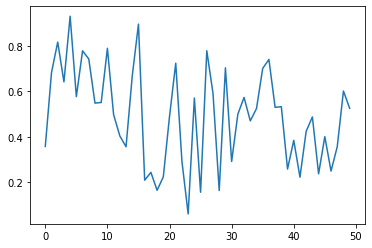

In [20]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

z1 = sigmoid(a1)
print(z1[0])
plt.plot(z1[1])

In [23]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

z1 = tanh(a1)
print(z1[0])

[-0.00983082 -0.88067212  0.97565661  0.64804786  0.84790048 -0.10527707
 -0.2444248   0.7391054  -0.20714766  0.12747679  0.63114954 -0.49512233
  0.59400082 -0.09796115 -0.21228672  0.86200286 -0.77288539 -0.9388906
  0.12021907 -0.89747879  0.79392335  0.50227748 -0.14774149 -0.9975737
  0.632665   -0.72937831 -0.493993   -0.58944414 -0.98085436  0.82774962
 -0.650541    0.36564398  0.75896202  0.06879257  0.31697366 -0.85308372
  0.46742456  0.47377442 -0.13540196 -0.49477076 -0.63341292 -0.48006975
 -0.30578201  0.39622058 -0.54679837  0.78337855  0.76675006 -0.01143702
  0.28083822 -0.1903064 ]


In [26]:
def relu(x):
    return np.maximum(0,x)

z1 = relu(a1)
print(z1[0])

[0.         0.         2.19819785 0.77192578 1.24863517 0.
 0.         0.9485048  0.         0.12817412 0.7433245  0.
 0.68382561 0.         0.         1.30108752 0.         0.
 0.1208033  0.         1.08195607 0.5523474  0.         0.
 0.74584734 0.         0.         0.         0.         1.18094583
 0.         0.38338551 0.99376231 0.0689014  0.32827914 0.
 0.50676979 0.51492602 0.         0.         0.         0.
 0.         0.41915768 0.         1.05405677 1.01239322 0.
 0.28859183 0.        ]


In [27]:
def affine_layer_forward(X,W,b):
    y = np.dot(X,W)+b
    cache = (X,W,b)
    return y,cache

In [28]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size,hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size,output_size)
b2 = np.zeros(output_size)

a1,cache = affine_layer_forward(X,W1,b1)
z1 = sigmoid(a1)
a2,cache = affine_layer_forward(z1,W2,b2)

[-0.07565537  0.66931716 -0.06383238  0.18598627  0.4081618   0.44400335
 -0.23826418  0.53405979 -0.3570466   0.0258708 ]


In [41]:
def softmax(x):
    if x.ndim==2:
        x = x.T
        x = x-np.max(x,axis=0)
        y = np.exp(x) / np.sum(np.exp(x),axis=0)
        return y.T
    x = x-np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

In [42]:
y_hat = softmax(a2)
y_hat[0]

array([0.07534393, 0.15870322, 0.07624001, 0.09787636, 0.12222707,
       0.12668733, 0.06403659, 0.13862584, 0.05686455, 0.0833951 ])

In [58]:
def _change_one_hot_label(X,num_category):
    T = np.zeros((X.size,num_category))
    for idx,row in enumerate(T):
        row[X[idx]] = 1
        
    return T

In [60]:
Y_digit = y_train[:5]
t = _change_one_hot_label(Y_digit,10)
t

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [96]:
#cross entropy 손실함수를 이용해 실제결과값과 예측값의 loss를 계산하고 이 값을 줄일 수 있는 방향으로 학습한다.

def cross_entropy_error(y,t):
    if y.ndim==1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
    if t.size==y.size:
        t = t.argmax(axis=1)

    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t])) / batch_size

In [97]:
Loss = cross_entropy_error(y_hat,t)
Loss

2.186593207470544